In [1]:
# Import libraries keras, numpy, pandas, tensorflow, matplotlib
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Import dataset
dataset = pd.read_csv('timeseriesdata.csv')

In [3]:
# View dataset
dataset

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
# drop No
dataset.drop(columns=['No'], inplace=True)

In [5]:
dataset

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


In [7]:
# drop NAN values for subset pm2.5
dataset.dropna(subset=['pm2.5'], axis=0, inplace=True)

In [8]:
dataset

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
 8   cbwd    41757 non-null  object 
 9   Iws     41757 non-null  float64
 10  Is      41757 non-null  int64  
 11  Ir      41757 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.1+ MB


In [10]:
# Create timestamp
dataset['timestamp'] = pd.to_datetime(dataset[['year', 'month', 'day', 'hour']])

In [11]:
dataset

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [12]:
# Drop year, month, day, hour from dataset 
dataset.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [13]:
dataset

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,timestamp
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [14]:
# Dataset
# id Name   age
# 1  ken    20
# 2  Broni  21

In [15]:
dataset = dataset.set_index(['timestamp'])

In [16]:
dataset

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


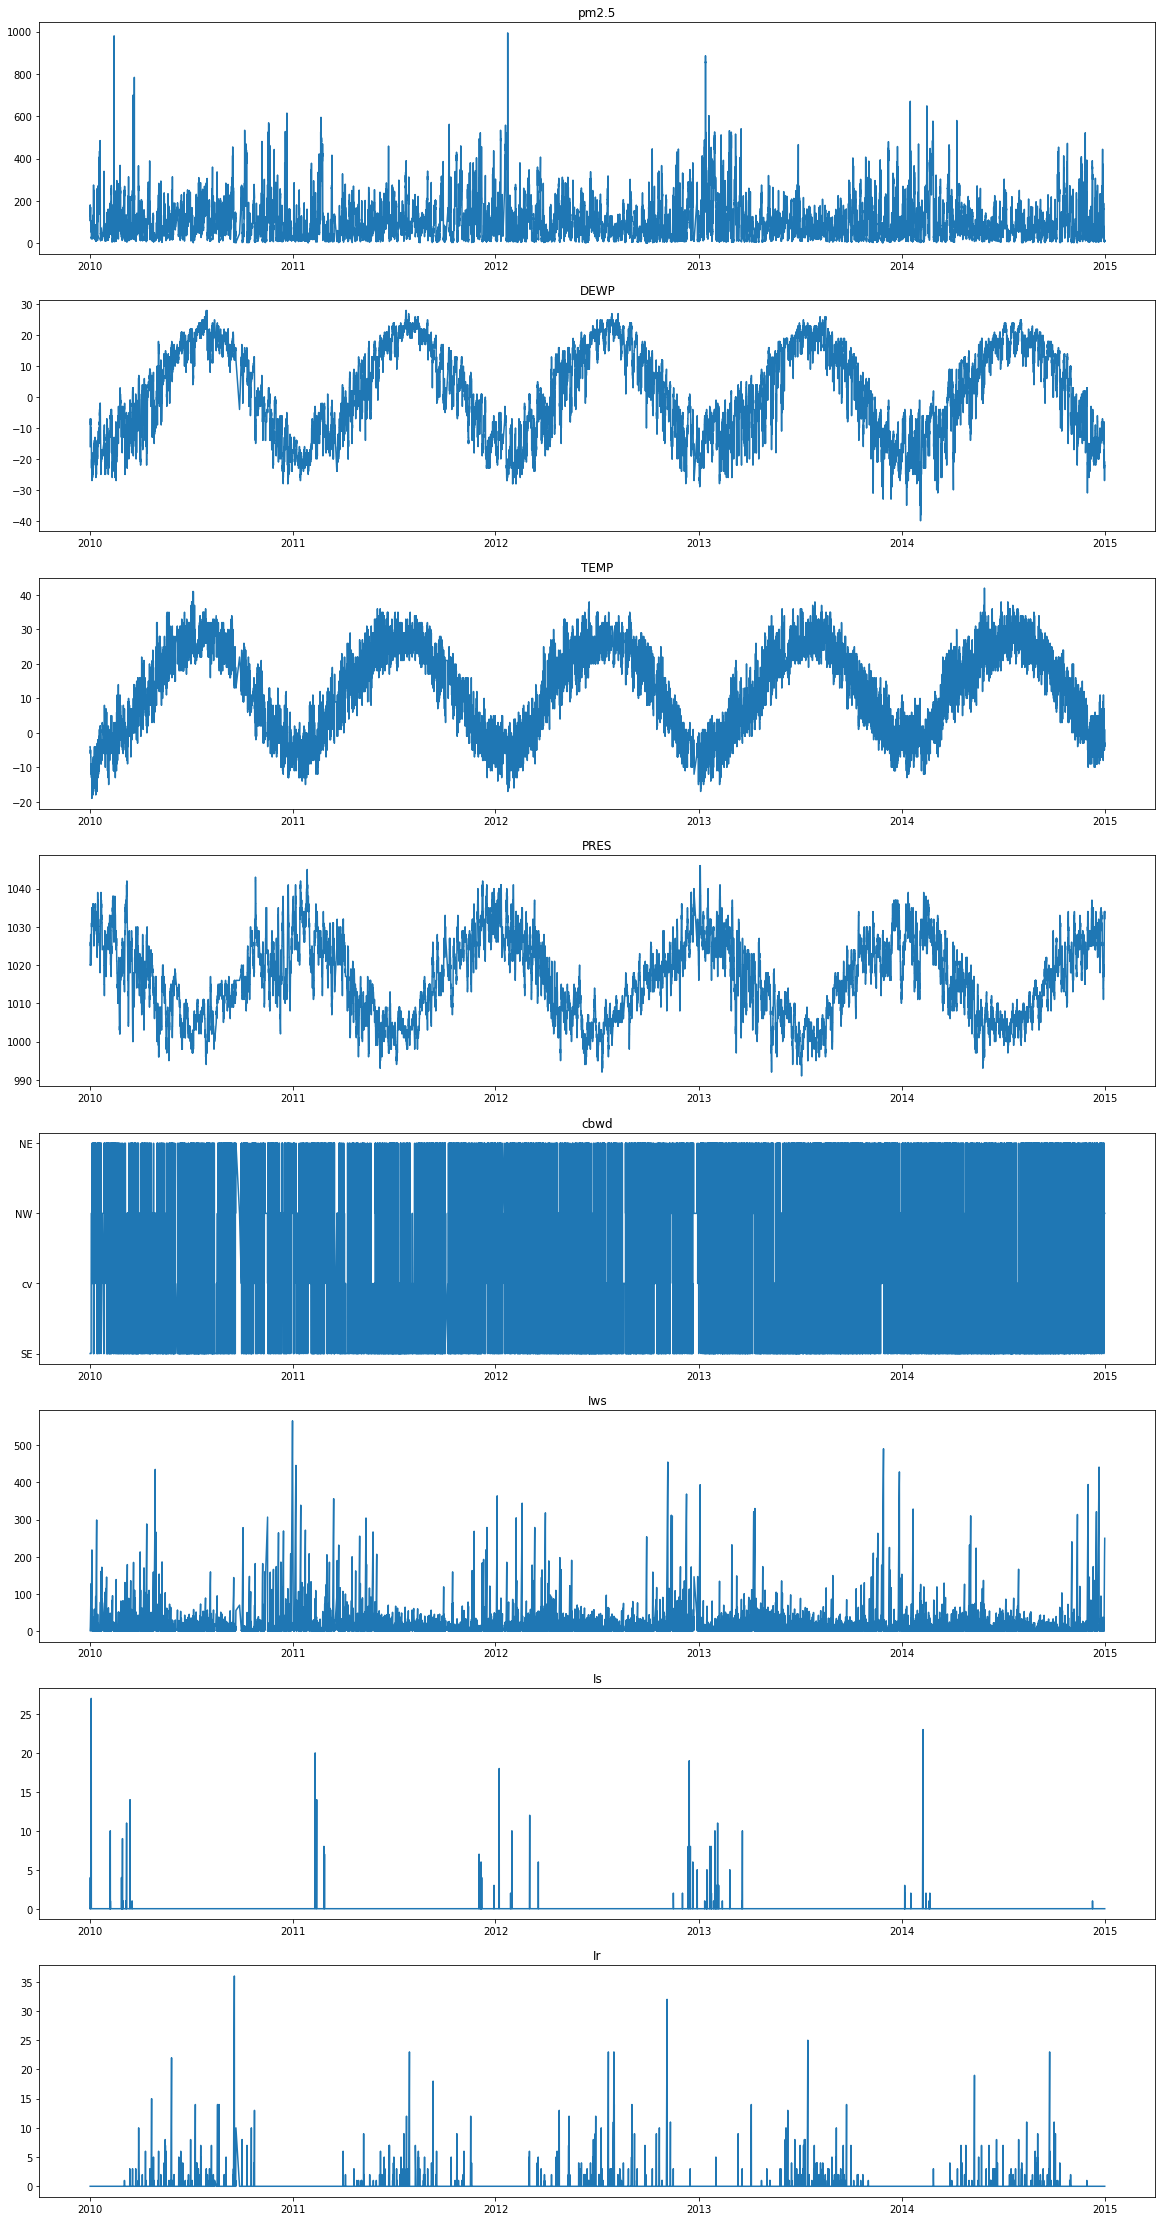

In [17]:
# Plot
no_cols = len(dataset.columns)
index = 1

plt.figure(figsize=(20, 40))
for column in dataset.columns:
    plt.subplot(no_cols, 1, index)
    plt.plot(dataset[column])
    plt.title(column)
    index+=1

In [18]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
dataset['cbwd'] = le.fit_transform(dataset['cbwd'])

In [20]:
dataset['cbwd']

timestamp
2010-01-02 00:00:00    2
2010-01-02 01:00:00    2
2010-01-02 02:00:00    2
2010-01-02 03:00:00    2
2010-01-02 04:00:00    2
                      ..
2014-12-31 19:00:00    1
2014-12-31 20:00:00    1
2014-12-31 21:00:00    1
2014-12-31 22:00:00    1
2014-12-31 23:00:00    1
Name: cbwd, Length: 41757, dtype: int32

In [21]:
dataset

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


In [22]:
dataset.sort_values('cbwd')

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2014-06-19 03:00:00,146.0,19,21.0,1003.0,0,1.79,0,0
2013-11-01 08:00:00,167.0,3,5.0,1028.0,0,1.79,0,0
2011-10-10 02:00:00,105.0,11,15.0,1024.0,0,0.89,0,0
2013-11-01 09:00:00,139.0,3,7.0,1028.0,0,2.68,0,0
2013-11-02 09:00:00,290.0,4,6.0,1024.0,0,1.79,0,0
...,...,...,...,...,...,...,...,...
2012-05-30 23:00:00,43.0,7,15.0,1018.0,3,1.34,0,0
2012-05-31 00:00:00,68.0,7,15.0,1018.0,3,2.23,0,0
2014-03-01 15:00:00,10.0,-24,11.0,1021.0,3,1.79,0,0


In [23]:
# Import MinMaxScaler
# 100, 200, 300, 400, 700 [100+300]
# 1,    2,   3,   4,   7  [1+3] 0 - 1
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [25]:
dataset

array([[0.12977867, 0.35294118, 0.24590164, ..., 0.00237151, 0.        ,
        0.        ],
       [0.14889336, 0.36764706, 0.24590164, ..., 0.00394662, 0.        ,
        0.        ],
       [0.15995976, 0.42647059, 0.2295082 , ..., 0.00552173, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.26470588, 0.26229508, ..., 0.42873071, 0.        ,
        0.        ],
       [0.00804829, 0.26470588, 0.24590164, ..., 0.43584525, 0.        ,
        0.        ],
       [0.01207243, 0.27941176, 0.26229508, ..., 0.44138468, 0.        ,
        0.        ]])

In [26]:
# Split Dataset into trainig and testing part
from sklearn.model_selection import train_test_split

In [27]:
train, test = train_test_split(dataset, test_size=0.3)

In [28]:
# Import TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
n_inputs = 3
n_features = 8
genTrain = TimeseriesGenerator(train, train, length=n_inputs, batch_size=1)
genTest = TimeseriesGenerator(test, test, length=n_inputs, batch_size=1)

In [30]:
# Build TimeSeriesModel
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [31]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_inputs, n_features)))
model.add(Dense(n_features))

In [32]:
model.compile(optimizer='adam', loss='mse')

In [33]:
model.fit(genTrain, epochs=10)

Epoch 1/10
29226/29226 [==============================] - 164s 5ms/step - loss: 0.0302
Epoch 2/10
29226/29226 [==============================] - 153s 5ms/step - loss: 0.0298
Epoch 3/10
29226/29226 [==============================] - 152s 5ms/step - loss: 0.0298
Epoch 4/10
29226/29226 [==============================] - 154s 5ms/step - loss: 0.0297
Epoch 5/10
29226/29226 [==============================] - 151s 5ms/step - loss: 0.0297
Epoch 6/10
29226/29226 [==============================] - 156s 5ms/step - loss: 0.0297
Epoch 7/10
29226/29226 [==============================] - 154s 5ms/step - loss: 0.0297
Epoch 8/10
29226/29226 [==============================] - 153s 5ms/step - loss: 0.0297
Epoch 9/10
29226/29226 [==============================] - 150s 5ms/step - loss: 0.0297
Epoch 10/10
29226/29226 [==============================] - 154s 5ms/step - loss: 0.0297


In [34]:
# Save model
model.save('timeseriesModel.h5')

In [35]:
model.history.history

{'loss': [0.030228616669774055,
  0.02981511875987053,
  0.02976001612842083,
  0.029723523184657097,
  0.029719196259975433,
  0.029706861823797226,
  0.029703931882977486,
  0.029708335176110268,
  0.029696743935346603,
  0.02970443107187748]}

In [36]:
predictions = []
first_batch = train[-n_inputs: ]
current_batch = first_batch.reshape((1, n_inputs, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch_rm_first = current_batch[:,1:]
    current_batch = np.append(current_batch_rm_first, [[current_pred]], axis=1)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 48ms/step
